In [ ]:

import random
from PIL import Image
import keras
import matplotlib.pyplot as plt


In [ ]:
!wget "https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0" -O malaria.zip

!unzip malaria.zip

%cd malaria

--2022-11-23 11:42:49--  https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.113, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p3l87p6bbsvqnguui2ieq4jpc50tmbh7/1669203750000/07111638629254909344/*/1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF?e=download&uuid=da26a1f8-cb03-41a8-a6bd-d3c88dfa4492 [following]
--2022-11-23 11:42:54--  https://doc-00-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p3l87p6bbsvqnguui2ieq4jpc50tmbh7/1669203750000/07111638629254909344/*/1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF?e=download&uuid=da26a1f8-cb03-41a8-a6bd-d3c88dfa4492
Resolving doc-00-bk-docs.googleusercontent.com (doc-00-bk-docs.googleusercontent.com)... 142.251.2.132,

In [4]:
import pandas as pd
import numpy as np
import os
import cv2

list_of_class1 = os.listdir("malaria/Parasitized")
list_of_class0 = os.listdir("malaria/Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("malaria/Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("malaria/Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)



In [5]:
print(len(list_of_class1))
print(len(list_of_class0))

500
500


In [6]:
print(dataset[0],labels[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 1.0


In [7]:
import matplotlib.pyplot as plt


In [8]:
from random import shuffle

In [9]:
data = np.array(dataset)
labels = np.array(labels)
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]
labels = labels[idx]

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2022-11-25 13:25:12.479194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 13:25:12.770094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/robertrompf/Documents/coding/Machine_Learning_and_Deep_Learning/.venv/lib/python3.10/site-packages/cv2/../../lib64:/app/lib
2022-11-25 13:25:12.770130: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-25 13:25:14.488133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loade

In [11]:
def prep_dataset(X,y):
    
    X_prep = X.astype('float32')/255
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

In [12]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(data,labels, test_size=0.15, shuffle=True,stratify=labels,random_state=42)
X_ts, X_val, Y_ts, Y_val = train_test_split(X_ts,Y_ts, test_size=0.5, stratify=Y_ts,random_state=42)
X_tr, Y_tr = prep_dataset(X_tr,Y_tr)
X_val, Y_val = prep_dataset(X_val,Y_val)
X_ts, _ = prep_dataset(X_ts,Y_ts)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = models.Sequential()
#Input + Conv 1 + ReLU + Max Pooling
model.add(layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=X_tr.shape[1:]))
model.add(layers.MaxPool2D(strides=4))
model.add(layers.BatchNormalization())
# Conv 2 + ReLU + Max Pooling
model.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
# Conv 3 + ReLU + Max Pooling
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
# Conv 4 + ReLU + Max Pooling
model.add(layers.Conv2D(256,(3,3),dilation_rate=(2,2),padding='same',activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
# Fully Connected + ReLU
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
#Output
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy',mode='max',patience=5,verbose=1)
history= model.fit(X_tr,Y_tr,
                 epochs=10,
                 batch_size=100,
                 validation_data=(X_val,Y_val),
                 callbacks=[es])

Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: 0.8018 - accuracy: 0.6353 - val_loss: 0.6933 - val_accuracy: 0.5067
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 0.5409 - accuracy: 0.7000 - val_loss: 0.7223 - val_accuracy: 0.5067
Epoch 3/10
9/9 [==============================] - 16s 2s/step - loss: 0.4356 - accuracy: 0.7906 - val_loss: 0.7495 - val_accuracy: 0.5067
Epoch 4/10
9/9 [==============================] - 16s 2s/step - loss: 0.3853 - accuracy: 0.8341 - val_loss: 0.6998 - val_accuracy: 0.5067
Epoch 5/10
9/9 [==============================] - 16s 2s/step - loss: 0.2540 - accuracy: 0.9000 - val_loss: 0.8069 - val_accuracy: 0.5067
Epoch 6/10
9/9 [==============================] - 16s 2s/step - loss: 0.1729 - accuracy: 0.9329 - val_loss: 0.7593 - val_accuracy: 0.5200
Epoch 7/10
9/9 [==============================] - 16s 2s/step - loss: 0.1413 - accuracy: 0.9471 - val_loss: 0.6464 - val_accuracy: 0.6267
Epoch 8/10
9/9 [==================

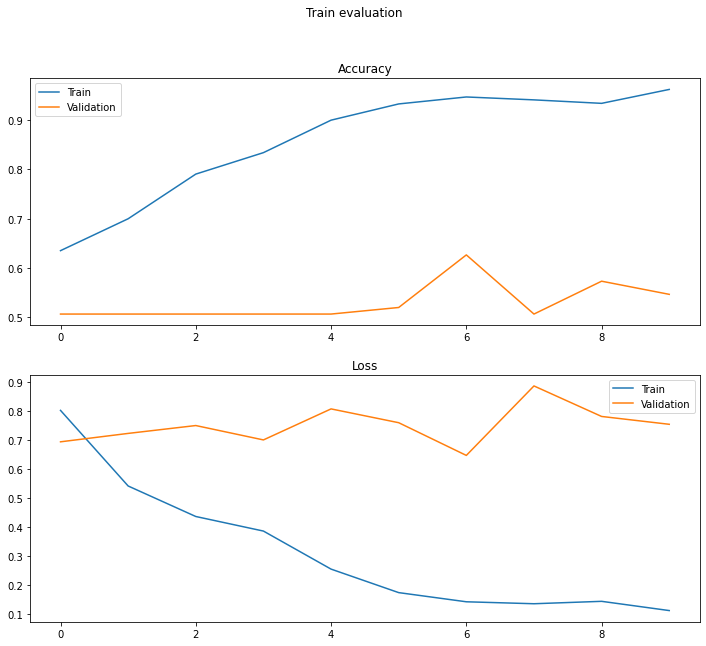

In [ ]:
import seaborn as sns
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])
ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])
ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
plt.show()